In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('/content/heart_2020_cleaned.csv')

In [6]:
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [9]:
data.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [10]:
#calculate BMI
height = float(input("Enter your height in cm: "))
weight = float(input("Enter your weight in kg: "))
BMI = weight / (height/100)**2
print(f"Your BMI is {BMI}")

Enter your height in cm: 170
Enter your weight in kg: 60
Your BMI is 20.761245674740486


In [11]:
#information visualization
data.hist(bins = 10 , figsize= (14,10))
plt.show()

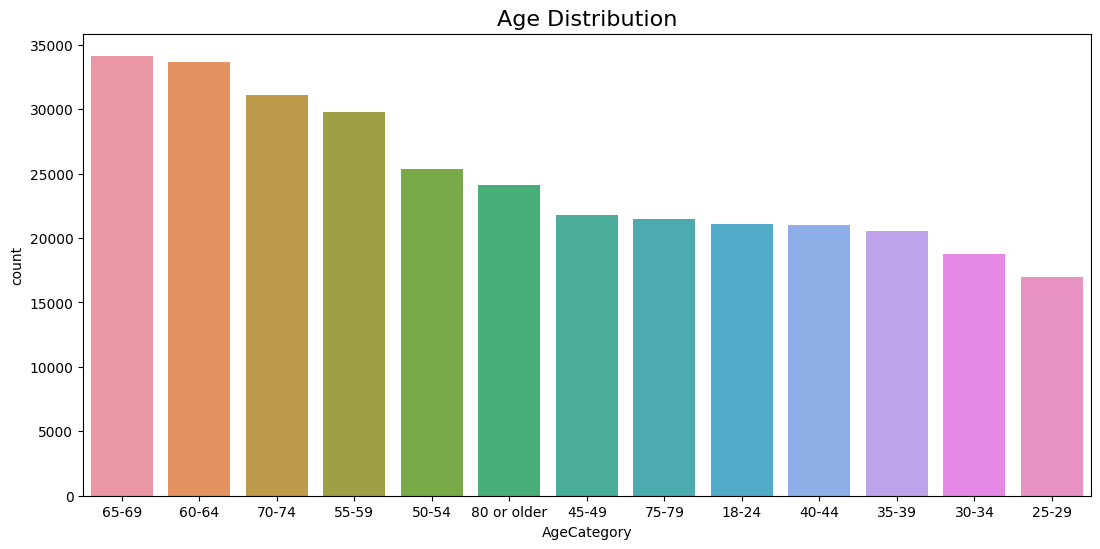

In [12]:
plt.figure(figsize = (13,6))
sns.countplot(x=data["AgeCategory"], order = data['AgeCategory'].value_counts().index)
plt.title('Age Distribution', fontsize=16)
plt.show()

In [13]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'AgeCategory', hue = 'HeartDisease', data = data, order = data['AgeCategory'].value_counts().index, palette = ["#FF604D","#009ABB"])
plt.title('Age Distribution and Heart Disease', fontsize=16)
plt.show()

In [14]:
plt.figure(figsize = (3,5))
sns.histplot(data=data, x="Sex", hue="HeartDisease", multiple="stack")
plt.title('Gender and Heart Disease', fontsize=8)
plt.show()

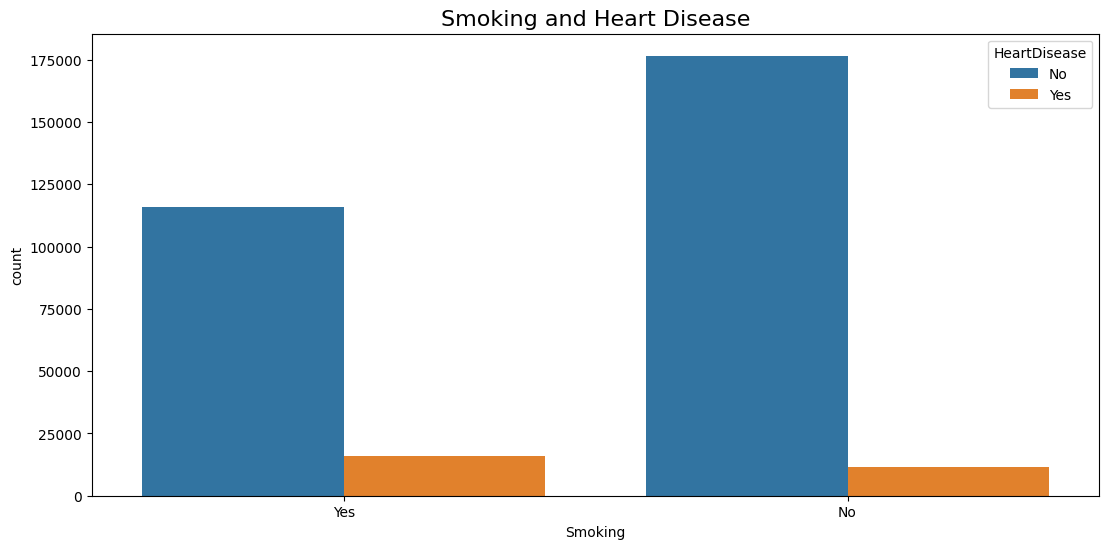

In [15]:
plt.figure(figsize = (13,6))
sns.countplot(x = 'Smoking', hue = 'HeartDisease', data = data)
plt.title('Smoking and Heart Disease', fontsize=16)
plt.show()

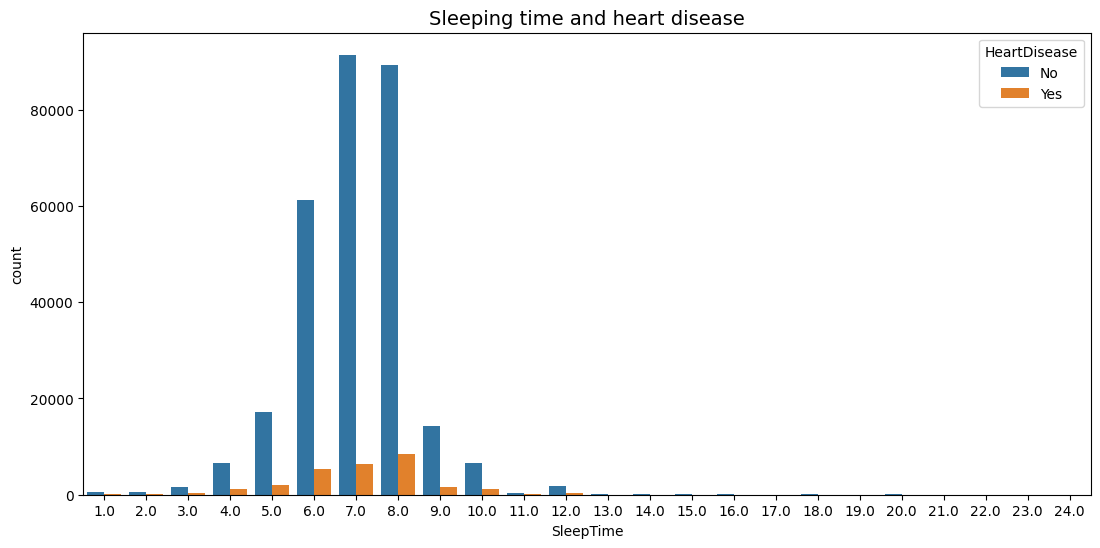

In [16]:
#heart disease and sleeping time
plt.figure(figsize = (13,6))
sns.countplot(x = data['SleepTime'], hue = data['HeartDisease'])
plt.title('Sleeping time and heart disease', fontsize=14)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv('/content/heart_2020_cleaned.csv')

In [19]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [20]:
X = data.drop(columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'] )
X.head(2)
y = data['HeartDisease']

In [21]:
data

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [22]:
X = pd.get_dummies(X)

In [23]:
X

BMI  PhysicalHealth  MentalHealth  SleepTime
0       16.60             3.0          30.0        5.0
1       20.34             0.0           0.0        7.0
2       26.58            20.0          30.0        8.0
3       24.21             0.0           0.0        6.0
4       23.71            28.0           0.0        8.0
...       ...             ...           ...        ...
319790  27.41             7.0           0.0        6.0
319791  29.84             0.0           0.0        5.0
319792  24.24             0.0           0.0        6.0
319793  32.81             0.0           0.0       12.0
319794  46.56             0.0           0.0        8.0

[319795 rows x 4 columns]

In [24]:
X.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lgr = LogisticRegression()
lgr.fit(X, y)

LogisticRegression()

In [27]:
lgr.score(X, y)

0.9144045404086993

In [28]:
import pickle

In [29]:
with open('heart_2020_cleaned.pkl', 'wb') as f:
  pickle.dump(lgr, f)

In [30]:
with open('heart_2020_cleaned.pkl', 'rb') as f:
  reloaded_model = pickle.load(f)

In [31]:
reloaded_model

LogisticRegression()